In [1]:
import os
import numpy as np
import torch

from torch_geometric.data import Data, Dataset
from graph_functions import build_WaveSuite

In [2]:
import torch_geometric

print(f"Torch version: {torch.__version__}")
print(f"Cuda available: {torch.cuda.is_available()}")
print(f"Torch geometric version: {torch_geometric.__version__}")

Torch version: 2.0.1+cu117
Cuda available: True
Torch geometric version: 2.3.1


In [3]:
# parent_folder = '../../Datasets/WaveSuite_VTK_fake_copy'    # 'temporal_practice_wavesuite'
parent_folder = '/home/caq13/realhome/WaveSuite/regularWave'
original_folder = parent_folder + '/.'  # Also called orig_dir

features_list = ['nut'] 

original_files_list = os.listdir(original_folder)
original_files_list = [file for file in original_files_list if file[-4:]=='.vtu']

sparse_adjacency_matrix = torch.load('../preprocessing/wave_complete_edge_list.pt')
sparse_adjacency_matrix = sparse_adjacency_matrix.long()

xmin_orig = 0
xmax_orig = 7.2

In [4]:
original_files_list

['regularWave_86.vtu',
 'regularWave_42.vtu',
 'regularWave_39.vtu',
 'regularWave_100.vtu',
 'regularWave_54.vtu',
 'regularWave_118.vtu',
 'regularWave_44.vtu',
 'regularWave_95.vtu',
 'regularWave_73.vtu',
 'regularWave_25.vtu',
 'regularWave_48.vtu',
 'regularWave_60.vtu',
 'regularWave_57.vtu',
 'regularWave_85.vtu',
 'regularWave_97.vtu',
 'regularWave_70.vtu',
 'regularWave_131.vtu',
 'regularWave_0.vtu',
 'regularWave_66.vtu',
 'regularWave_21.vtu',
 'regularWave_6.vtu',
 'regularWave_121.vtu',
 'regularWave_127.vtu',
 'regularWave_17.vtu',
 'regularWave_59.vtu',
 'regularWave_91.vtu',
 'regularWave_19.vtu',
 'regularWave_11.vtu',
 'regularWave_130.vtu',
 'regularWave_32.vtu',
 'regularWave_46.vtu',
 'regularWave_89.vtu',
 'regularWave_29.vtu',
 'regularWave_117.vtu',
 'regularWave_53.vtu',
 'regularWave_111.vtu',
 'regularWave_36.vtu',
 'regularWave_83.vtu',
 'regularWave_56.vtu',
 'regularWave_67.vtu',
 'regularWave_98.vtu',
 'regularWave_92.vtu',
 'regularWave_116.vtu',
 're

In [5]:
wavesuite_object_train = build_WaveSuite(root=parent_folder, original_files_list=original_files_list, 
                                   features_list='U', fixed_edge_index=sparse_adjacency_matrix,
                      xmin_orig = xmin_orig, xmax_orig = xmax_orig , minimum_scaler=0, maximum_scaler=1 ,
                                  test='train' )

RETURN list:  processed_file_names
self.indices() :  range(0, 105)


In [6]:
wavesuite_object_validation = build_WaveSuite(root=parent_folder, original_files_list=original_files_list, 
                                   features_list=features_list, fixed_edge_index=sparse_adjacency_matrix,
                      xmin_orig = xmin_orig, xmax_orig = xmax_orig , minimum_scaler=0, maximum_scaler=1 ,
                                  test='validation' )

RETURN list:  processed_file_names
self.indices() :  range(0, 13)


In [7]:
wavesuite_object_test = build_WaveSuite(root=parent_folder, original_files_list=original_files_list, 
                                   features_list=features_list, fixed_edge_index=sparse_adjacency_matrix,
                      xmin_orig = xmin_orig, xmax_orig = xmax_orig , minimum_scaler=0, maximum_scaler=1 ,
                                  test='test' )

RETURN list:  processed_file_names
self.indices() :  range(0, 14)


In [8]:
wavesuite_object_test

build_WaveSuite(14)

In [9]:
from torch_geometric.loader import DataLoader

In [10]:
NUM_GRAPHS_PER_BATCH = 8
train_loader = DataLoader(wavesuite_object_train, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
validation_loader = DataLoader(wavesuite_object_validation, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
test_loader = DataLoader(wavesuite_object_test, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)

In [11]:
print(train_loader)

In [12]:
from train_top_AE import train_top_AE, evaluate_top_AE , model_MSE_error


In [42]:
#This dictionary stores the losses results of the models
results_models = {}

#These are the models specifications
num_features = 1  #This is always 1
embedding_sequence = None
num_epochs = 500 #Change to 20 and then to 50 
n_points = wavesuite_object_train[0].x.shape[0]  
print(n_points)


311203


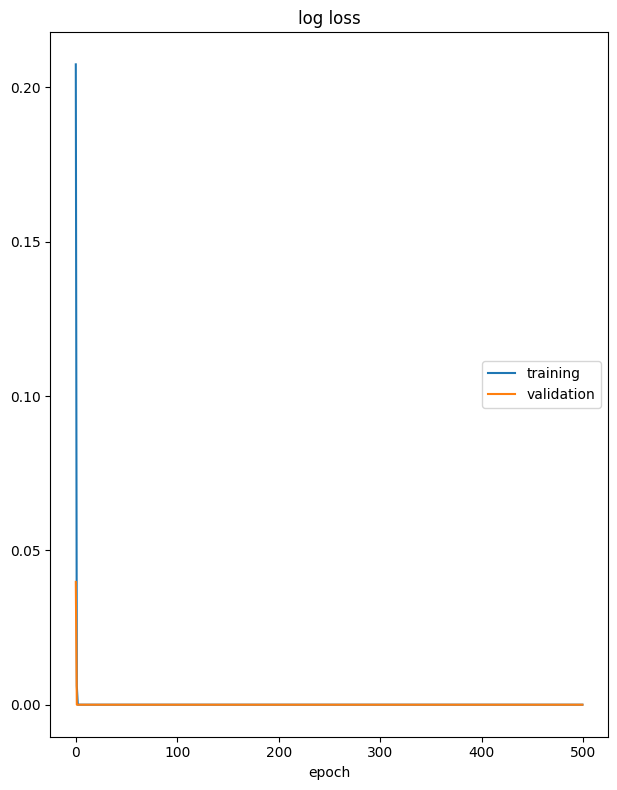

log loss
	training         	 (min:    0.000, max:    0.207, cur:    0.000)
	validation       	 (min:    0.000, max:    0.040, cur:    0.000)

 Number of parameters:  319246499
Time taken:  1730.6169233322144


In [44]:
import time

# Use GPU for training
preferred_device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
# preferred_device = torch.device("cpu")
start = time.time()

latent_space_dim = 256

model_name = 'latDim256'

model1, results_models[model_name] = train_top_AE(train_loader, validation_loader, 
                                                n_points, num_features, embedding_sequence=embedding_sequence , 
                                                latent_space_dim=latent_space_dim, ae_model_type='classic_AE_variant3', 
                                                num_epochs=num_epochs, device=preferred_device)

end = time.time()

print('Time taken: ',end-start) 

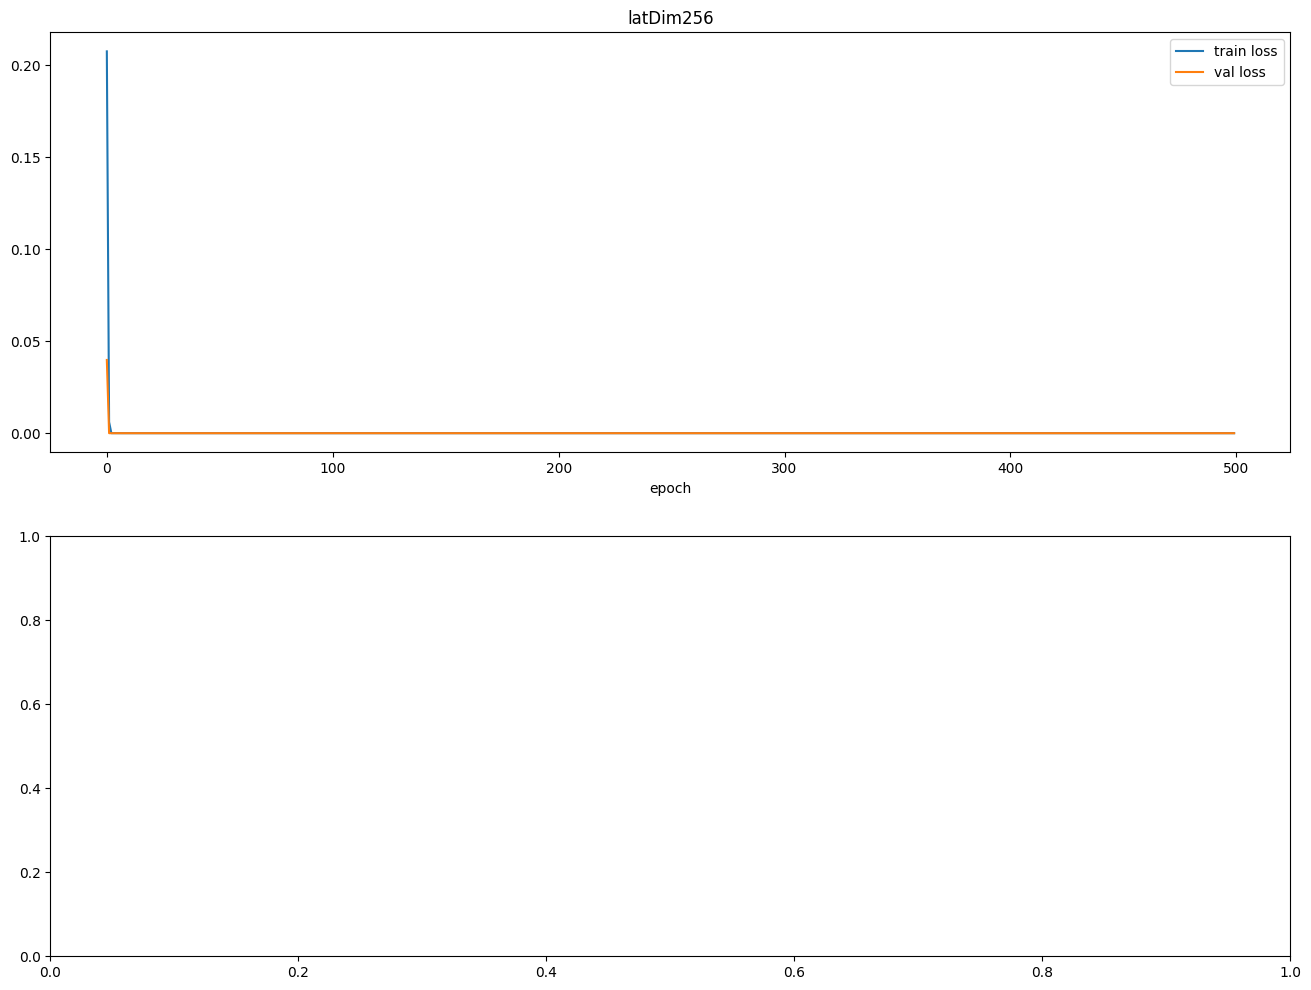

In [46]:
import sys
sys.path.insert(0, '../../auxiliary_scripts')

from rank_models import plot_losses , rank_losses
models_names = list( results_models.keys() )
filename = 'classic_AE_variant3_256latDim_WaveSuite'+'.png'
plot_losses(results_models, models_names, figsize=(16,12), filename=filename)

In [47]:
rank_losses(results_models, models_names, selected_epoch = int(num_epochs/4) )

,variants_name,final_validation_loss
0,latDim256,5.175424e-09


In [48]:
rank_losses(results_models, models_names, selected_epoch = int(num_epochs/2) )

,variants_name,final_validation_loss
0,latDim256,5.175425e-09


In [49]:
first_column_model_name = 'classic_AE_variant1_256latDim'
filename = 'final_model_WaveSuite'+'_50epochs.csv'

df_losses = rank_losses(results_models, models_names, selected_epoch = num_epochs,
                       first_column_model_name = first_column_model_name, filename = filename )

df_losses

CSV was saved


,Model name,variants_name,final_validation_loss
0,classic_AE_variant1_256latDim,latDim256,5.175425e-09


In [75]:
# Directory to save checkpoints
checkpoint_dir = './checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

# Model
model = Net(
    num_node_features=1,
    num_output_features=1,
    ).to(device)

In [78]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
model.train()
for epoch in range(1000):
    train_loss = 0.0
    test_loss = 0.0

    # Training
    model.train()
    for batch in train_loader:
        data = batch.to(device)
        optimizer.zero_grad()
        data.x = data.x.double()  # Transform input features to double data type
        data.y = data.y.double()  # Transform target values to double data type
        out = model(data)

        loss = F.mse_loss(out, data.y)  # MSE loss for regression
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * data.num_graphs

    # Testing
    model.eval()
    with torch.no_grad():
        for batch in test_loader:
            data = batch.to(device)
            data.x = data.x.double()  # Transform input features to double data type
            data.y = data.y.double()  # Transform target values to double data type
            out = model(data)
            loss = F.mse_loss(out, data.y)  # MSE loss for regression

            test_loss += loss.item() * data.num_graphs

    # Compute average loss
    train_loss /= len(train_loader.dataset)
    test_loss /= len(test_loader.dataset)

    if epoch % 50 == 0:
        print(f"Epoch: {epoch}, Train Loss: {train_loss}, Test Loss: {test_loss}")

        # Save a checkpoint
        checkpoint_path = os.path.join(checkpoint_dir, f'checkpoint_{epoch}.pt')
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'train_loss': train_loss,
            'test_loss': test_loss,
        }, checkpoint_path)





AttributeError: 'NoneType' object has no attribute 'double'

In [61]:
    model1.eval()
    with torch.no_grad():
        for batch in test_loader:
            data = batch.to('cuda')
            out = model1(data)

TypeError: classic_AE_variant3.forward() missing 1 required positional argument: 'edge_index'

In [51]:
filename_to_copy_structure = '../../../Datasets/WaveSuite_VTK/sateNo4_1_51.vtu'
plot_model_3D_vtu(model1, wavesuite_object_test, 6, filename_to_copy_structure, 
                      show_edges=False, random=True, is_data_in_loader=False, 
                      save_fig=True, filename='final_model_WaveSuite_50epochs.eps')

Indexes plotted [10  1  0  4  3  9]


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)